In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('../data/gdp_percapita.csv.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [3]:
#  ### 4.Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. 
# ake a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

In [4]:
gdp_df .head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [5]:
gdp_df .tail()


,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [6]:
#5How many rows and columns are in gdp_df? What are the data types of each column?
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [7]:
# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df = gdp_df.drop(columns = ["Value Footnotes"])

In [9]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year','Value':'GDP_Per_Capita'})

In [10]:
# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year
# . What do you notice? 
gdp_df.groupby("Country")["Year"].count()

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64

In [11]:
# # 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
# # Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section.
# Create a histogram, a density plot, a boxplot, and a violin plot.
# #  What do you notice when you look at these plots? How do the plots compare and 
# what information can you get out of one type that you can't necessarily get out of the others?

In [13]:
gdp_2020 = gdp_df[(gdp_df['Year'] == 2020)]

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

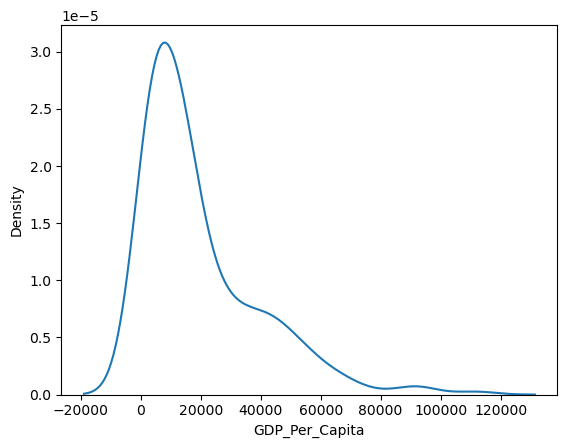

In [15]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

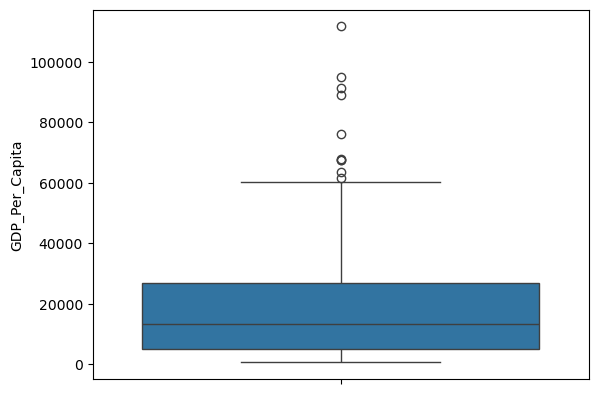

In [17]:
sns.boxplot(gdp_2020['GDP_Per_Capita'])

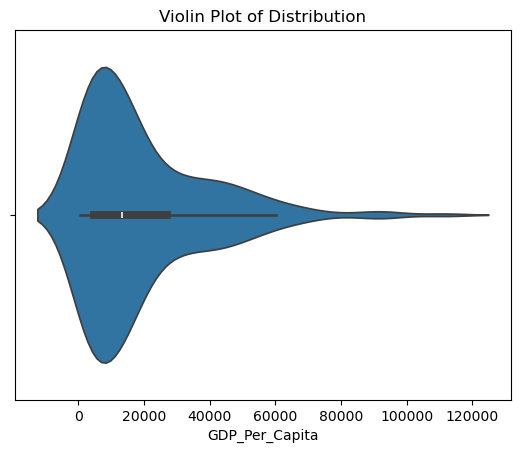

In [19]:
sns.violinplot(x='GDP_Per_Capita',
               data=gdp_2020)
plt.title('Violin Plot of Distribution')
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

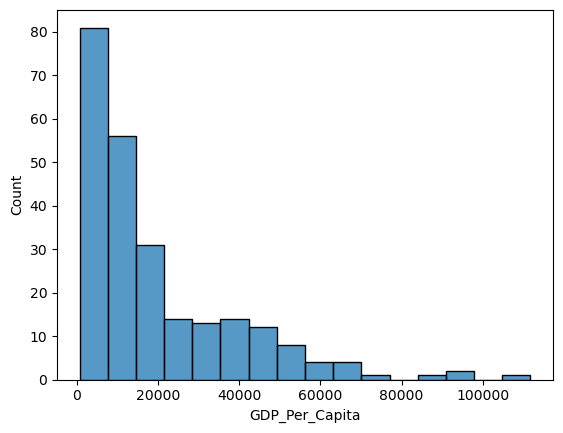

In [21]:
sns.histplot(data=gdp_2020, x='GDP_Per_Capita')

In [ ]:
# 9. What was the median GDP per capita value in 2020?

In [23]:
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

In [37]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
# Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

gdp_decades = gdp_2020.loc[gdp_2020.Year.isin([1990,2000,2010,2020])]

In [ ]:

# 11. Which country was the first to have a GDP per capita greater than $100,000?

In [41]:
gdp_over_100k = gdp_df[gdp_df['GDP_Per_Capita']>100000]

In [43]:
gdp_over_100k .head()

,Country,Year,GDP_Per_Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751


In [45]:
gdp_over_100k .tail()

,Country,Year,GDP_Per_Capita
6106,Singapore,2022,108036.110993
6107,Singapore,2021,107741.118436
7295,United Arab Emirates,1997,100956.706467
7301,United Arab Emirates,1991,101048.696239
7302,United Arab Emirates,1990,105893.626059


In [ ]:
# 12. Which country had the highest GDP per capita in 2020? 
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [49]:
gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]

Country              Luxembourg
Year                       2020
GDP_Per_Capita    111751.314751
Name: 4148, dtype: object

In [51]:
gdp_l = gdp_df[(gdp_df['Country'] == 'Luxembourg')]

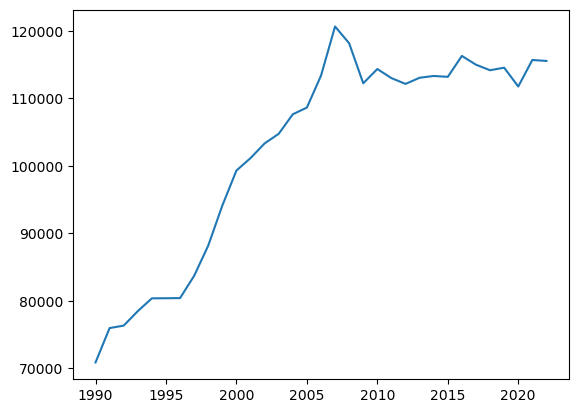

In [55]:
plt.plot(gdp_l.Year,gdp_l.GDP_Per_Capita)

In [ ]:
# 13. Which country had the lowest GDP per capita in 2020? 
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.